## Лабораторная работа №1 | Вариант 5

Выполнил: Новиков Сергей М80-311Б-22

### 1. Numpy

In [1]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [5]:
m = np.eye(3)
print(m)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [5]:
rgba_dtype = np.dtype([
    ('r', np.uint8),
    ('g', np.uint8),
    ('b', np.uint8),
    ('a', np.uint8)
])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [6]:
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [10]:
vector = np.random.rand(10)

sorted_vector = np.sort(vector)

print(vector)
print(sorted_vector)

[0.51905532 0.48194046 0.3244619  0.84617472 0.15441918 0.50717799
 0.26930014 0.678283   0.97806183 0.92083595]
[0.15441918 0.26930014 0.3244619  0.48194046 0.50717799 0.51905532
 0.678283   0.84617472 0.92083595 0.97806183]


5. Создайте read-only массив(неизменяемый)

In [13]:
array = np.random.rand(10)
array.flags.writeable = False
print (array)

array[1] = 2

[0.84604284 0.64717808 0.60675776 0.61883241 0.95383464 0.28915125
 0.34033692 0.5057493  0.62922728 0.85367797]


ValueError: assignment destination is read-only

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [7]:
cartesian = np.random.rand(10, 2)

x = cartesian[:,0]
y = cartesian[:,1]

polar = np.column_stack((np.sqrt(x**2 + y**2), np.arctan2(y,x)))

print(cartesian)
polar

[[0.5280621  0.92248358]
 [0.18060424 0.88611862]
 [0.83156557 0.2666786 ]
 [0.03983051 0.66159227]
 [0.56863955 0.72387077]
 [0.83438018 0.15680181]
 [0.22122052 0.00989394]
 [0.70885993 0.78276918]
 [0.55334872 0.31457877]
 [0.15443031 0.49830539]]


array([[1.06293251, 1.05089168],
       [0.90433628, 1.36973524],
       [0.87328047, 0.31033291],
       [0.66279016, 1.51066489],
       [0.92051064, 0.90492622],
       [0.84898592, 0.18575954],
       [0.22144166, 0.04469455],
       [1.05603503, 0.83490702],
       [0.63651756, 0.51693567],
       [0.52168667, 1.27027188]])

7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [12]:
n = 5
x_values = np.linspace(0, 1, n)
y_values = np.linspace(0, 1, n)

x_x, y_y = np.meshgrid(x_values, y_values)
coordinates = np.column_stack((x_x.ravel(), y_y.ravel()))

coordinate_dtype = np.dtype([
    ('x', np.float64),
    ('y', np.float64)
])

structured_coordinates = np.array([
    (xy[0], xy[1]) for xy in coordinates
], dtype=coordinate_dtype)

print(structured_coordinates)

[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )
 (0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)
 (0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )
 (0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)
 (0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [13]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))

print(1.0/ (x[:, None]-y[None,:]))

[[34.58488386 -4.78711713  0.81740501  0.7703789   7.76868722]
 [-1.07999997 -0.85930267  3.7237927   2.91356417 -1.21048017]
 [-0.53125667 -0.47166749 -1.45378433 -1.63083952 -0.56100296]
 [18.13068069 -5.47485528  0.80024039  0.75511402  6.45316842]
 [-2.32925138 -1.49895632  1.30693861  1.19072326 -3.03476342]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [17]:
array= np.random.normal(size=5).astype(dtype=np.float32)
print(array)
array = array.astype(np.int32, copy=False)

print(array)
array.dtype

[-1.1159014  -1.0737098   0.39971605  1.0808067   1.6314083 ]
[-1 -1  0  1  1]


dtype('int32')

10. Как случайно заменить p элементов в 2D массиве?

In [19]:
array = np.random.normal(size=25).reshape(5, 5)

num_rows, num_columns = array.shape

flat_indices = np.random.choice(num_rows * num_columns, size=5, replace=False)

row_indices, column_indices = np.unravel_index(flat_indices, (num_rows, num_columns))

array[row_indices, column_indices] = 7

array


array([[-1.28523154, -0.06424572,  0.03297215,  0.73825263,  0.56326396],
       [-0.23800224, -0.46111637,  7.        ,  7.        , -0.80289854],
       [ 0.16624331, -0.32175594,  1.82771587, -0.51272506,  0.3571939 ],
       [-0.74106123,  7.        ,  1.79554323, -0.19435144,  7.        ],
       [ 7.        ,  0.1167842 , -0.93395454, -0.45357918,  1.00099545]])

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [21]:
import pandas as pd

In [22]:
# Load dataset here
data = pd.read_csv('data.csv')

1. Узнайте сколько было на борту человек

In [24]:
total_passengers = len(data)
total_passengers

891

2. Какой медианный и средний возраста пассажиров

In [25]:
mean_age = data['Age'].mean()
median_age=data['Age'].median()
print(mean_age,median_age)

29.69911764705882 28.0


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [26]:
children = data[data['Age']<16]
adults =data[data['Age']>=16]
print(children['Survived'].mean()*100)
print(adults['Survived'].mean()*100)

59.036144578313255
38.193343898573694


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [27]:
women = data[data['Sex'] == 'female']
children = data[data['Age'] < 16]
men = data[(data['Sex']=='male')&(data['Age']>=16)]

women_survival_rate = women['Survived'].mean()*100
children_survival_rate = children['Survived'].mean()*100
men_survival_rate = men['Survived'].mean()*100

print(women_survival_rate)
print(children_survival_rate)
print(men_survival_rate)

74.20382165605095
59.036144578313255
17.433414043583532


5. Зависит ли выживаемость от класса обслуживания?

In [35]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Pclass'], data['Survived'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("yes")
else:
    print("no")

yes


6. Посчитайте средний возраст умерших женщин и мужчин

In [36]:
dead_women_age = data[(data['Survived'] == 0) & (data['Sex'] == 'female')]['Age'].mean()
dead_men_age = data[(data['Survived'] == 0) & (data['Sex'] == 'male')]['Age'].mean()
print(dead_women_age, dead_men_age)

25.046875 31.618055555555557


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [37]:
data['Relatives']=data['SibSp']+data['Parch']
with_family=data[data['Relatives'] > 0]
alone=data[data['Relatives']==0]
print(with_family['Survived'].mean()*100)
print(alone['Survived'].mean()*100)


50.56497175141242
30.353817504655495


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [38]:
fare_survived = data[data['Survived'] == 1]['Fare'].mean()
fare_died = data[data['Survived'] == 0]['Fare'].mean()
print(fare_died,fare_survived)

22.117886885245902 48.39540760233918


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [40]:
second_class_survivors = data[(data['Pclass'] == 2) & (data['Survived'] == 1)]
print(second_class_survivors['Age'].max(), second_class_survivors['Age'].min())

62.0 0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [41]:
men = data[data['Sex'] == 'male']

young_men = men[(men['Age'] >= 18) & (men['Age'] <= 40)]
older_men = men[men['Age'] > 40]
young_survival = young_men['Survived'].mean() * 100
older_survival = older_men['Survived'].mean() * 100

contingency = pd.crosstab(
    pd.cut(men['Age'], bins=[18, 40, 150], labels=['18-40', '40+']),
    men['Survived']
)

chi2, p_value, _, _ = chi2_contingency(contingency)

print("Young men (18–40):", young_survival)
print("Elder men 40:", older_survival)
print("p-value:", p_value)

if p_value < 0.05:
    print("Hypothesis true")
else:
    print("Hypothesis wrong")

Young men (18–40): 17.747440273037544
Elder men 40: 17.647058823529413
p-value: 1.0
Hypothesis wrong


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возрАстов пассажиров

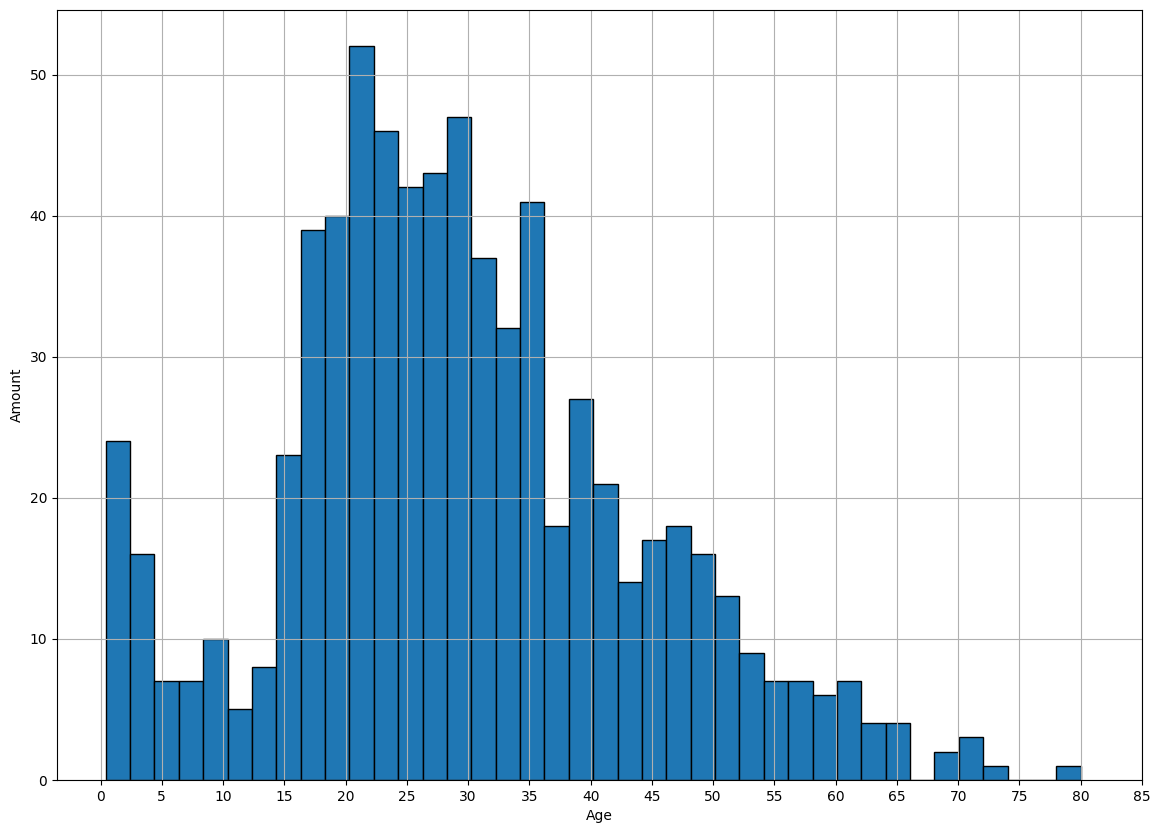

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))

plt.hist(data['Age'].dropna(), bins=40, edgecolor='black')
plt.xticks(range(0, 90, 5))
plt.xlabel('Age')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

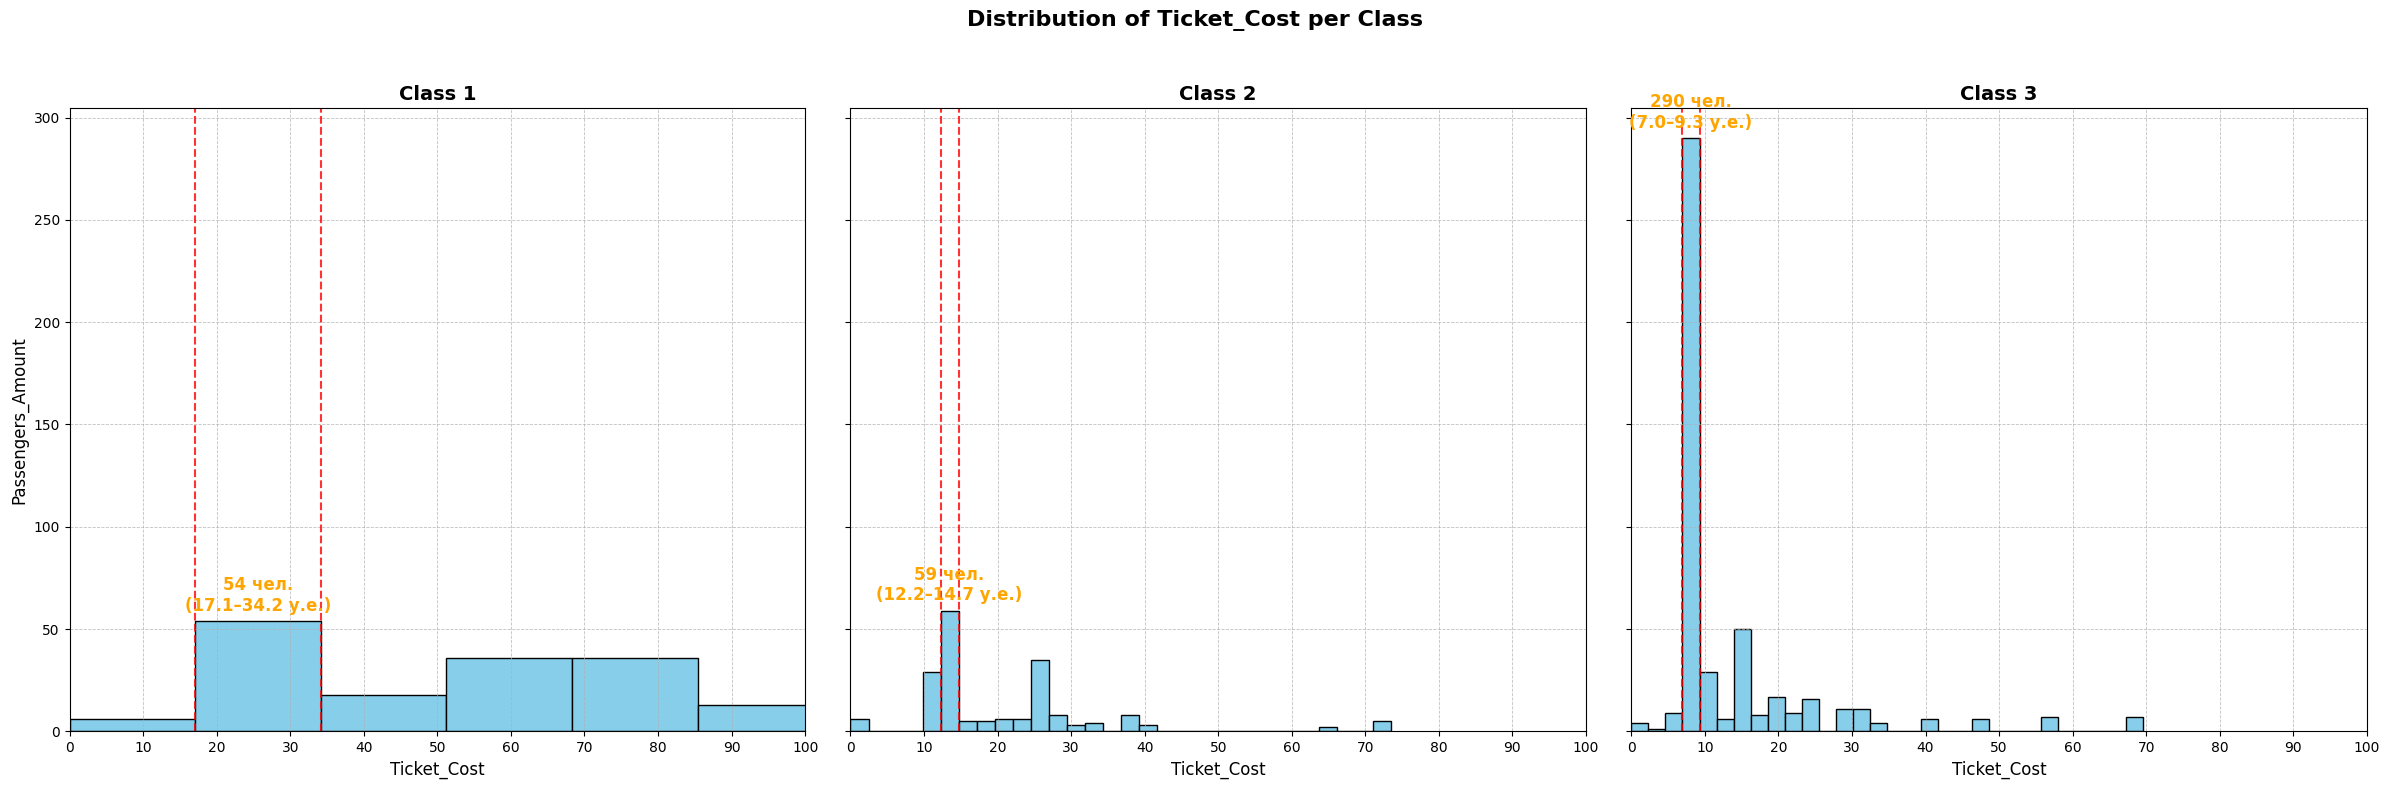

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=True)

classes = sorted(data['Pclass'].dropna().unique())
plt.style.use('default')

for i, cl in enumerate(classes):
    subset = data[data['Pclass'] == cl]['Fare'].dropna()

    counts, bins, patches = axes[i].hist(
        subset,
        bins=30,
        color='skyblue',
        edgecolor='black'
    )

    max_idx = np.argmax(counts)
    left_edge = bins[max_idx]
    right_edge = bins[max_idx + 1]
    max_height = counts[max_idx]
    mid = (left_edge + right_edge) / 2

    axes[i].axvline(left_edge, color='red', linestyle='--', linewidth=1.5, alpha=0.8)
    axes[i].axvline(right_edge, color='red', linestyle='--', linewidth=1.5, alpha=0.8)

    axes[i].text(
        mid,
        max_height + 5,
        f'{int(max_height)} чел.\n({left_edge:.1f}–{right_edge:.1f} у.е.)',
        ha='center',
        color='orange',
        fontsize=12,
        weight='bold'
    )

    axes[i].set_title(f'Class {cl}', fontsize=14, weight='bold')
    axes[i].set_xlabel('Ticket_Cost', fontsize=12)
    if i == 0:
        axes[i].set_ylabel('Passengers_Amount', fontsize=12)

    axes[i].set_xlim(0, 100)
    axes[i].set_xticks(np.arange(0, 101, 10))
    axes[i].grid(True, linestyle='--', linewidth=0.6, alpha=0.8)

plt.suptitle('Distribution of Ticket_Cost per Class', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

3. Постройте зависимость цены от возраста пассажира

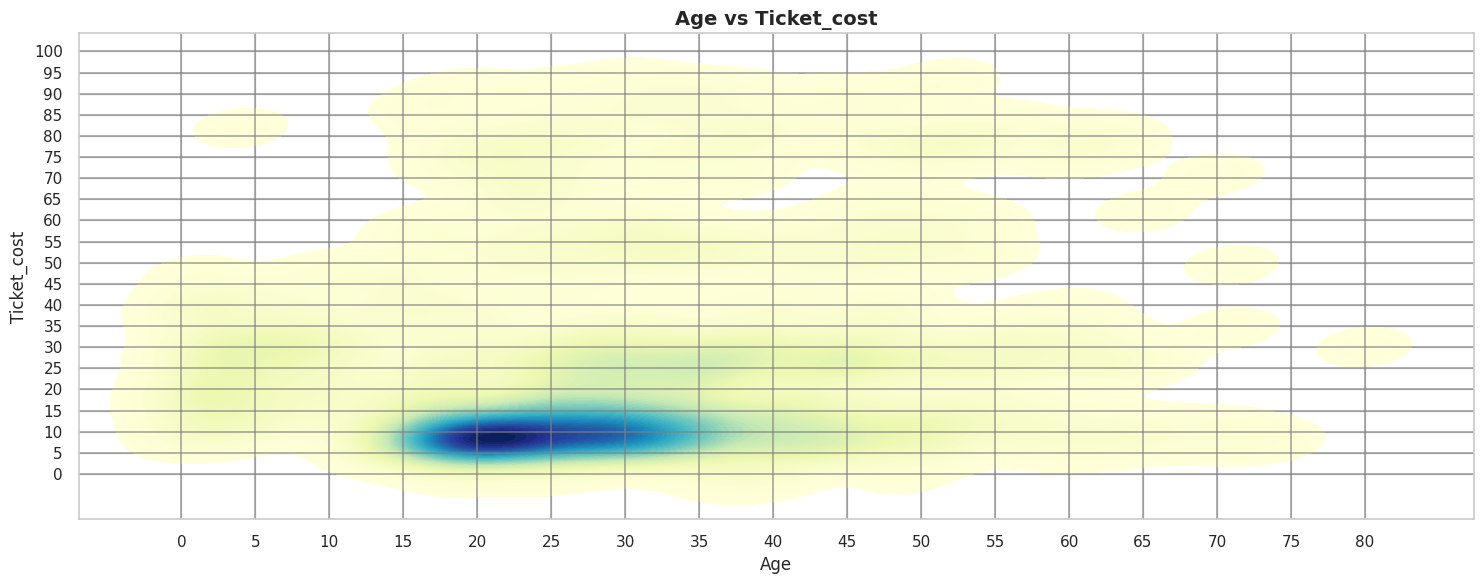

In [94]:
import seaborn as sns
filtered = data[['Age', 'Fare']].dropna()
filtered = filtered[(filtered['Fare'] <= 100) & (filtered['Age'] <= 80)]

fig, ax = plt.subplots(figsize=(15, 6))

sns.kdeplot(
    data=filtered,
    x='Age',
    y='Fare',
    fill=True,
    cmap='YlGnBu',
    bw_adjust=0.5,
    thresh=0.01,
    levels=100,
    gridsize=200,
    ax=ax
)

ax.set_yticks(np.arange(0, 101, 5))
ax.yaxis.set_tick_params(length=8, width=1.5)

ax.set_xticks(np.arange(0, 81, 5))
ax.xaxis.set_tick_params(length=8, width=1.5)

for y in np.arange(0, 101, 5):
    ax.axhline(y, color='gray', linewidth=1.2, alpha=0.7, linestyle='-')

for x in np.arange(0, 81, 5):
    ax.axvline(x, color='gray', linewidth=1.2, alpha=0.7, linestyle='-')

ax.set_title('Age vs Ticket_cost', fontsize=14, weight='bold')
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Ticket_cost', fontsize=12)
plt.tight_layout()
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

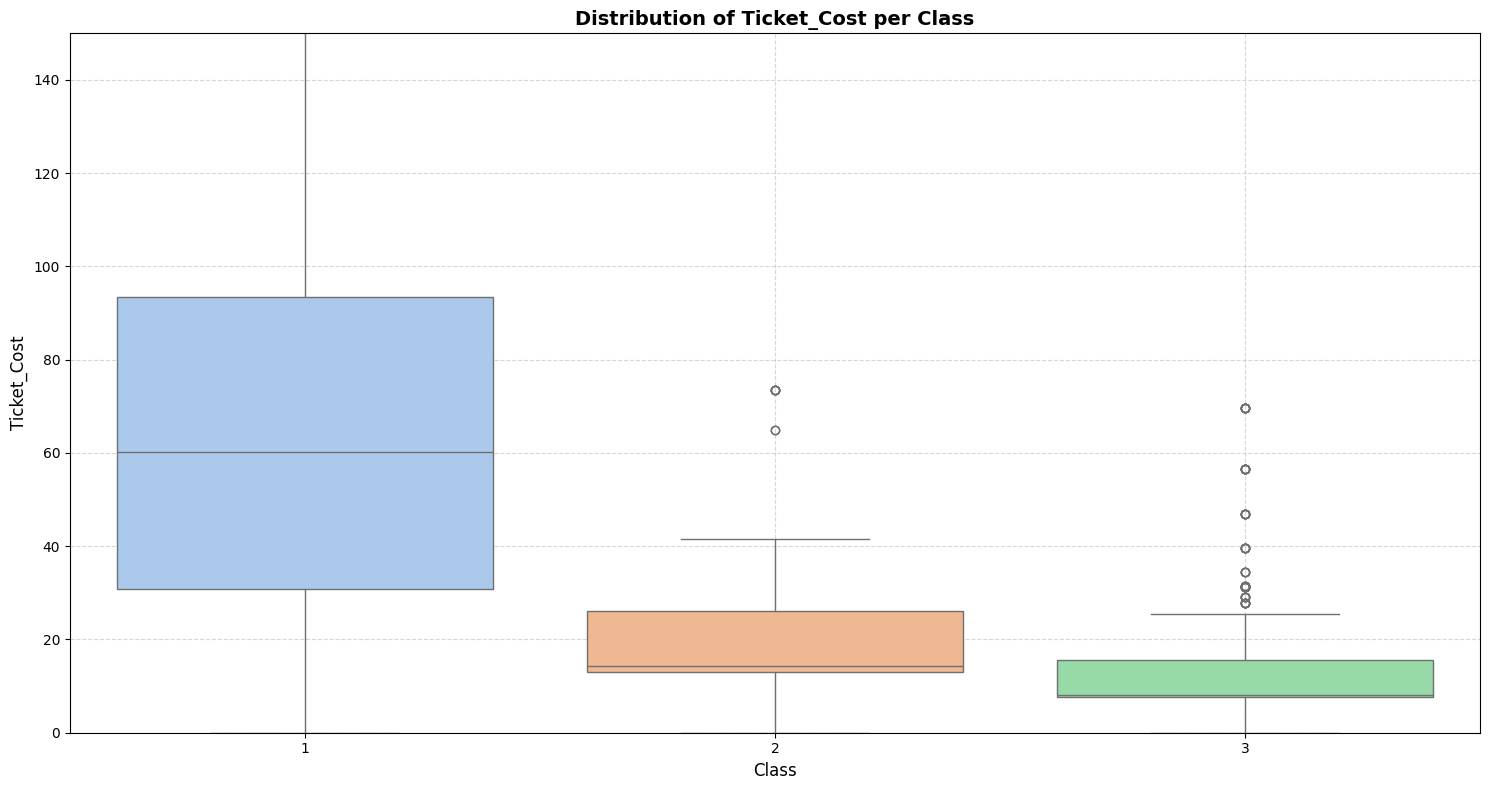

In [104]:
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=data,
    x='Pclass',
    y='Fare',
    hue='Pclass',
    palette='pastel',
    dodge=False
)

plt.legend([],[], frameon=False)
plt.title('Distribution of Ticket_Cost per Class', fontsize=14, weight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Ticket_Cost', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(0, 150)
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

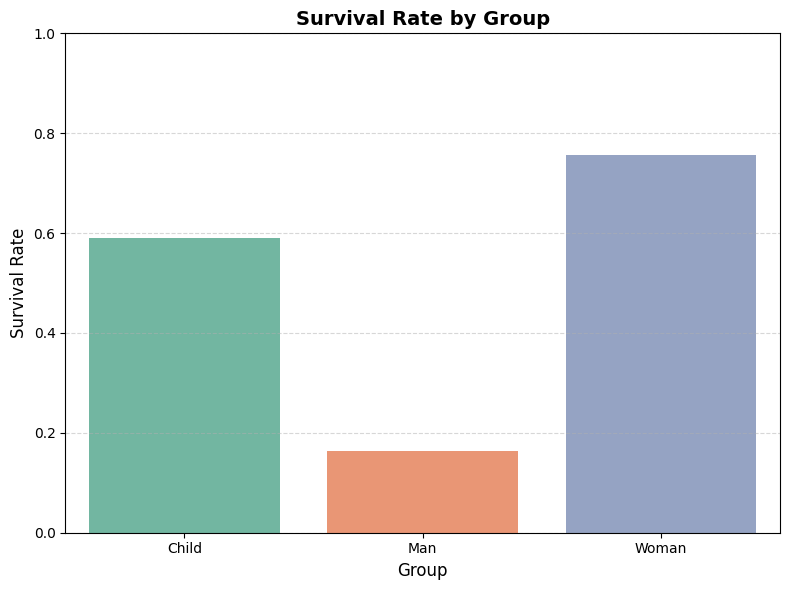

In [108]:
data_copy = data.copy()

def classify_group(row):
    if row['Age'] < 16:
        return 'Child'
    elif row['Sex'] == 'male':
        return 'Man'
    else:
        return 'Woman'

data_copy['Group'] = data_copy.apply(classify_group, axis=1)
survival_rates = data_copy.groupby('Group')['Survived'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(
    data=survival_rates,
    x='Group',
    y='Survived',
    hue='Group',
    palette='Set2',
    legend=False
)

plt.title('Survival Rate by Group', fontsize=14, weight='bold')
plt.xlabel('Group', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

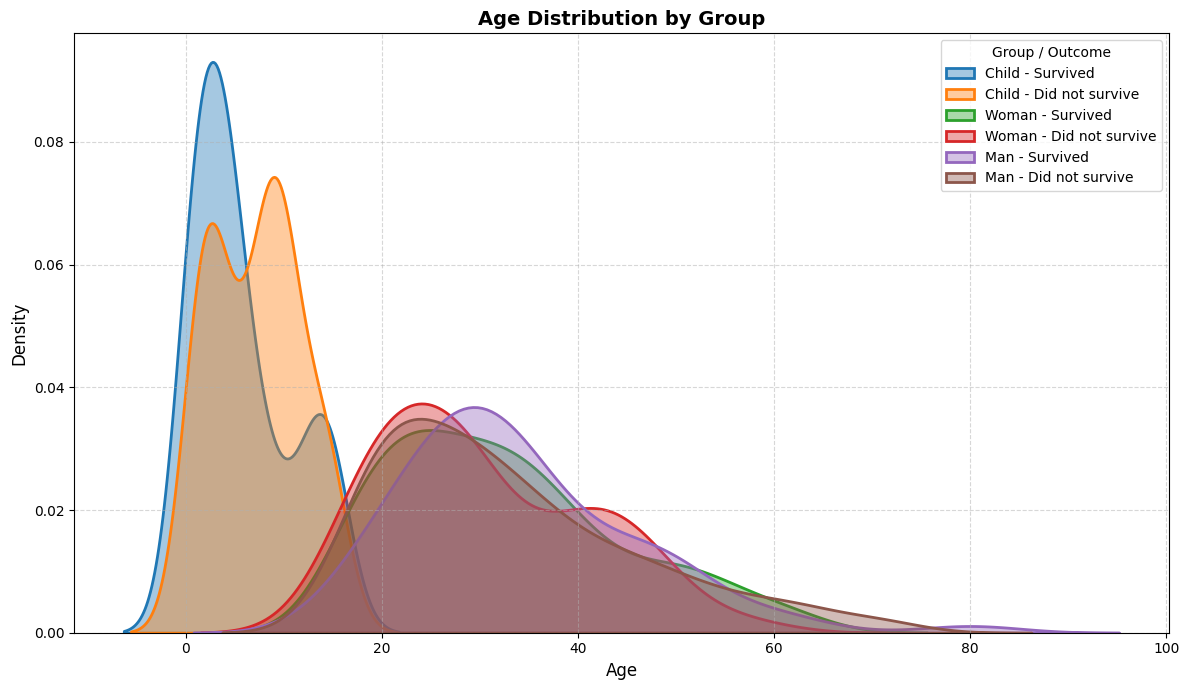

In [126]:
data_copy = data.copy()

def classify_group(row):
    if row['Age'] < 16:
        return 'Child'
    elif row['Sex'] == 'male':
        return 'Man'
    else:
        return 'Woman'

data_copy['Group'] = data_copy.apply(classify_group, axis=1)

plt.figure(figsize=(12, 7))

palette = {1: 'green', 0: 'red'}

for group in ['Child', 'Woman', 'Man']:
    for survived in [1, 0]:
        subset = data_copy[(data_copy['Group'] == group) & (data_copy['Survived'] == survived)]
        label = f'{group} - {"Survived" if survived == 1 else "Did not survive"}'
        sns.kdeplot(
            data=subset,
            x='Age',
            label=label,
            fill=True,
            alpha=0.4,
            linewidth=2
        )

plt.title('Age Distribution by Group', fontsize=14, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Group / Outcome')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


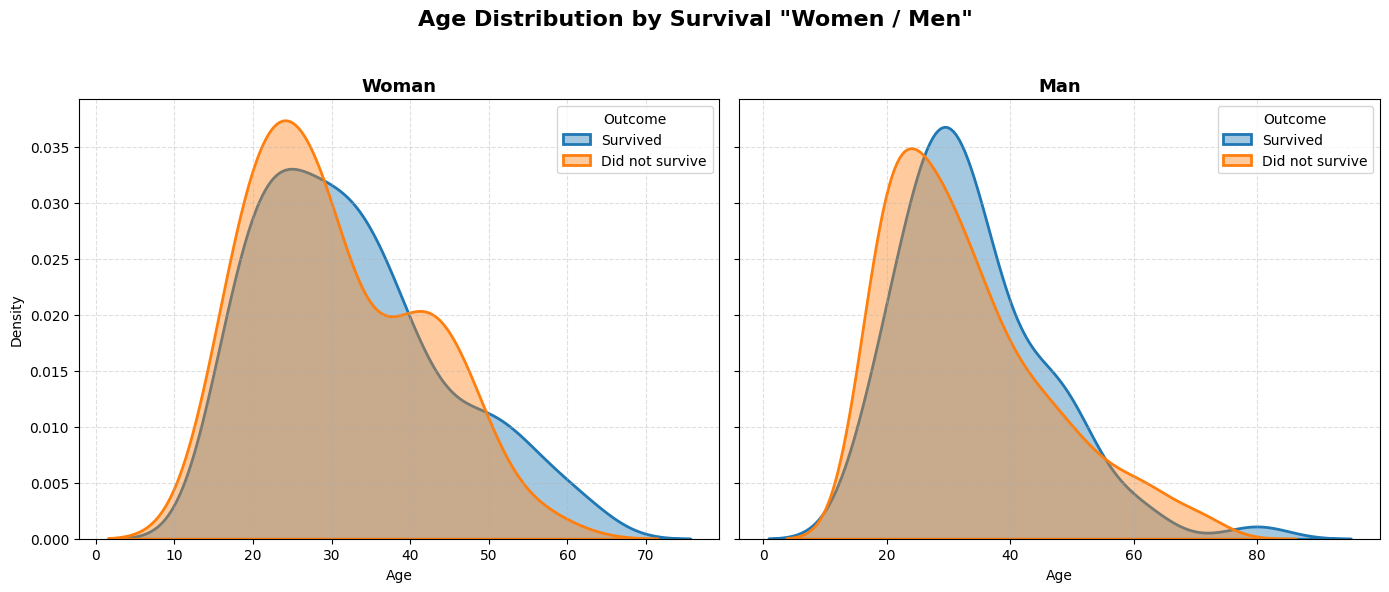

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_copy = data.copy()

data_copy['Group'] = data_copy.apply(
    lambda row: 'Child' if row['Age'] < 16 else ('Man' if row['Sex'] == 'male' else 'Woman'),
    axis=1
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
colors = {1: '#1f77b4', 0: '#ff7f0e'}

for ax, group in zip(axes, ['Woman', 'Man']):
    for survived in [1, 0]:
        subset = data_copy[(data_copy['Group'] == group) & (data_copy['Survived'] == survived)]
        if subset['Age'].dropna().empty:
            continue

        sns.kdeplot(
            data=subset,
            x='Age',
            label='Survived' if survived == 1 else 'Did not survive',
            fill=True,
            alpha=0.4,
            linewidth=2,
            ax=ax,
            color=colors[survived]
        )

    ax.set_title(group, fontsize=13, weight='bold')
    ax.set_xlabel('Age')
    ax.set_ylabel('Density')
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(title='Outcome')

fig.suptitle('Age Distribution by Survival "Women / Men"', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


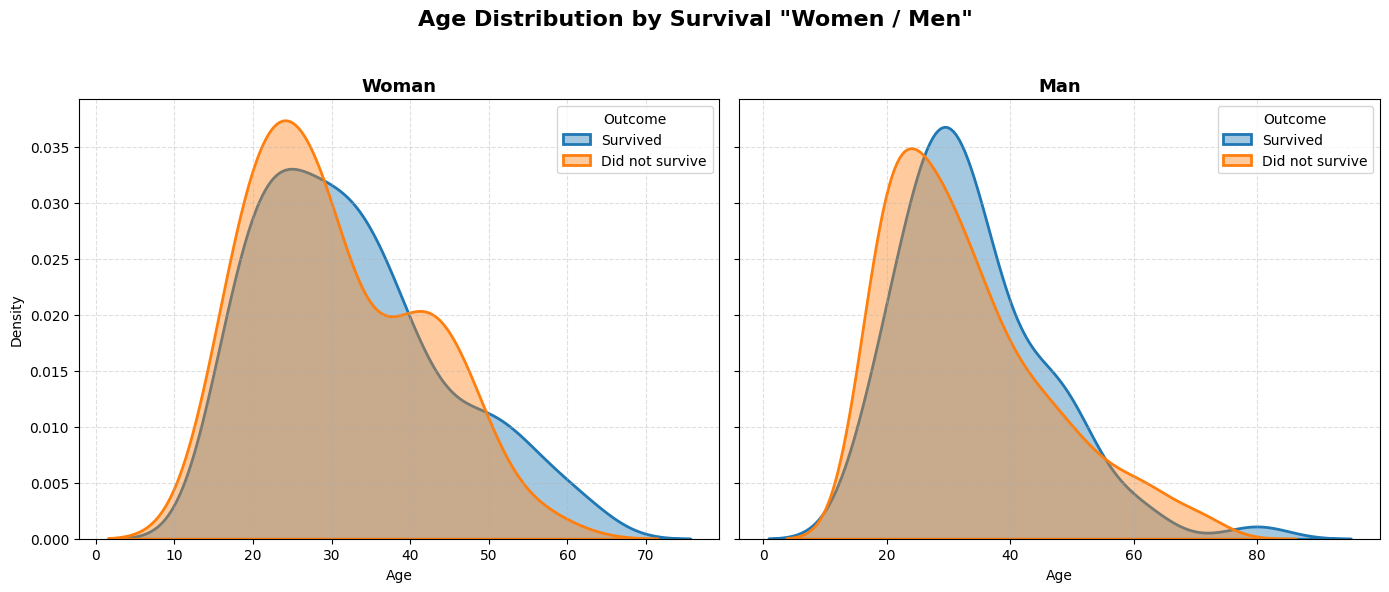

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_copy = data.copy()

data_copy['Group'] = data_copy.apply(
    lambda row: 'Child' if row['Age'] < 16 else ('Man' if row['Sex'] == 'male' else 'Woman'),
    axis=1
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
colors = {1: '#1f77b4', 0: '#ff7f0e'}

for ax, group in zip(axes, ['Woman', 'Man']):
    for survived in [1, 0]:
        subset = data_copy[(data_copy['Group'] == group) & (data_copy['Survived'] == survived)]
        if subset['Age'].dropna().empty:
            continue

        sns.kdeplot(
            data=subset,
            x='Age',
            label='Survived' if survived == 1 else 'Did not survive',
            fill=True,
            alpha=0.4,
            linewidth=2,
            ax=ax,
            color=colors[survived]
        )

    ax.set_title(group, fontsize=13, weight='bold')
    ax.set_xlabel('Age')
    ax.set_ylabel('Density')
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(title='Outcome')

fig.suptitle('Age Distribution by Survival "Women / Men"', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Вывод:**
График показывает, что если выжили/умерли, какова вероятность в каком возрастном диапазоне будет человек, учитывая ребенок/взрослый, женщина/мужчина.

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

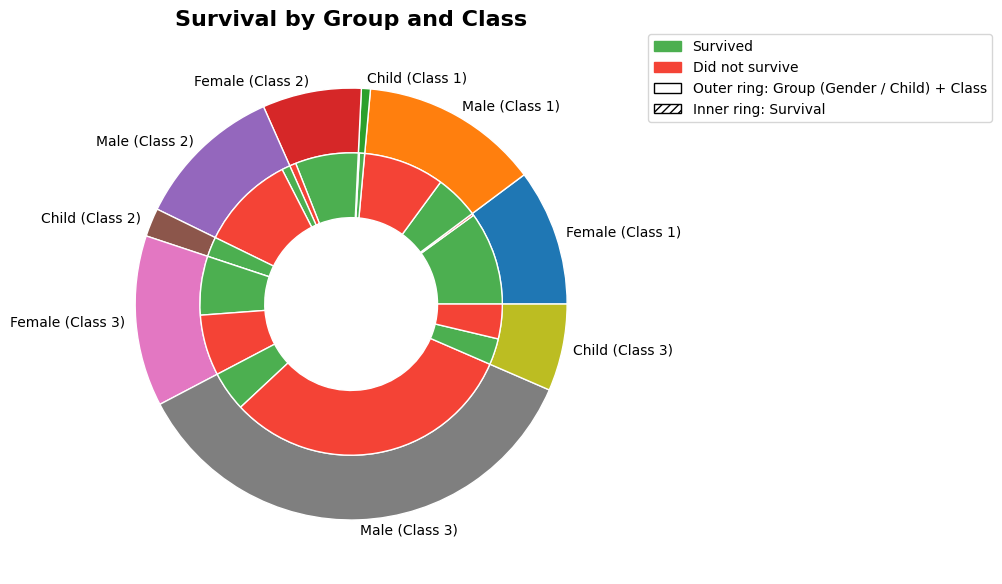

In [131]:
import matplotlib.patches as mpatches

data_copy = data.copy()
data_copy['Group'] = data_copy.apply(
    lambda row: 'Child' if row['Age'] < 16 else row['Sex'],
    axis=1
)

grouped = data_copy.groupby(['Pclass', 'Group', 'Survived']).size().reset_index(name='Count')

outer_labels = []
outer_sizes = []
inner_sizes = []
inner_colors = []

survival_colors = {1: '#4CAF50', 0: '#F44336'}

for pclass in sorted(data_copy['Pclass'].unique()):
    for group in ['female', 'male', 'Child']:
        sub = grouped[(grouped['Pclass'] == pclass) & (grouped['Group'] == group)]
        total = sub['Count'].sum()
        if total == 0:
            continue

        label = f"{group.capitalize()} (Class {pclass})"
        outer_labels.append(label)
        outer_sizes.append(total)

        for surv in [1, 0]:
            count = sub[sub['Survived'] == surv]['Count'].values
            inner_sizes.append(count[0] if len(count) > 0 else 0)
            inner_colors.append(survival_colors[surv])

fig, ax = plt.subplots(figsize=(10, 10))

outer_wedges, _ = ax.pie(
    outer_sizes,
    radius=1.0,
    labels=outer_labels,
    labeldistance=1.05,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

inner_wedges, _ = ax.pie(
    inner_sizes,
    radius=0.7,
    colors=inner_colors,
    wedgeprops=dict(width=0.3, edgecolor='w')
)

legend_elements = [
    mpatches.Patch(color='#4CAF50', label='Survived'),
    mpatches.Patch(color='#F44336', label='Did not survive'),
    mpatches.Patch(facecolor='white', edgecolor='black', label='Outer ring: Group (Gender / Child) + Class'),
    mpatches.Patch(facecolor='white', edgecolor='black', hatch='////', label='Inner ring: Survival')
]

plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.title('Survival by Group and Class', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()